In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cordova_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Import Dataset

In [2]:
df_api = pd.read_csv("../db/cdv/cordova_API.csv")
df_plugin_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_DECLARATION.csv")
df_plugin_permission_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_PERMISSION_DECLARATION.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [3]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [4]:
l_api = list(df_api.columns)
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [5]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,5,6,4,7,2,0,8,0,0,1,2,0,0,0,0
1,com.indiageeks.apk,5,1,1,1,13,0,1,1,0,2,1,4,1,0,0
2,com.koimoi.android,5,1,1,4,2,0,1,1,0,2,1,2,1,0,0
3,com.activitylabs.bankbluffer,5,0,0,8,1,0,4,0,0,3,0,0,0,0,0
4,prayerguide.thegagne.com,0,4,0,7,3,0,8,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,sportstables.com,5,1,1,1,2,0,1,1,0,2,1,2,1,0,0
574,com.phonegap.tip,0,2,0,1,2,0,1,0,0,1,2,0,0,0,0
575,com.ugliapps.iheartfruits,4,0,0,3,0,0,0,0,0,2,0,0,0,0,0
576,sunnyappz.thesecretquotes,5,0,0,8,0,0,0,0,0,2,0,1,0,0,0


In [6]:
df_plugin_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration,config.xml,plugins.xml
0,com.pr.ojectblue.dothis,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1
1,com.indiageeks.apk,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
2,com.koimoi.android,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0
3,com.activitylabs.bankbluffer,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0
4,prayerguide.thegagne.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,sportstables.com,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
574,com.phonegap.tip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
575,com.ugliapps.iheartfruits,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1
576,sunnyappz.thesecretquotes,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0


In [7]:
df_plugin_permission_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
1,com.indiageeks.apk,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
2,com.koimoi.android,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
3,com.activitylabs.bankbluffer,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0
4,prayerguide.thegagne.com,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,sportstables.com,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0
574,com.phonegap.tip,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0
575,com.ugliapps.iheartfruits,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
576,sunnyappz.thesecretquotes,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [8]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,5,6,4,7,2,0,8,0,0,1,2,0,0,0,0
1,5,1,1,1,13,0,1,1,0,2,1,4,1,0,0
2,5,1,1,4,2,0,1,1,0,2,1,2,1,0,0
3,5,0,0,8,1,0,4,0,0,3,0,0,0,0,0
4,0,4,0,7,3,0,8,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,5,1,1,1,2,0,1,1,0,2,1,2,1,0,0
574,0,2,0,1,2,0,1,0,0,1,2,0,0,0,0
575,4,0,0,3,0,0,0,0,0,2,0,0,0,0,0
576,5,0,0,8,0,0,0,0,0,2,0,1,0,0,0


### The occurance of plugins for entire dataset

In [9]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=True)
df_cnt

Total APKs: 578


inappbrowser             0
vibration                0
file                     3
statusbar               20
globalization          189
splashscreen           241
media-capture          286
network-information    299
contacts               301
camera                 368
geolocation            426
dialogs                442
battery-status         503
media                  533
device                 571
dtype: int64

In [10]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

inappbrowser            0.00
vibration               0.00
file                    0.52
statusbar               3.46
globalization          32.70
splashscreen           41.70
media-capture          49.48
network-information    51.73
contacts               52.08
camera                 63.67
geolocation            73.70
dialogs                76.47
battery-status         87.02
media                  92.21
device                 98.79
dtype: float64

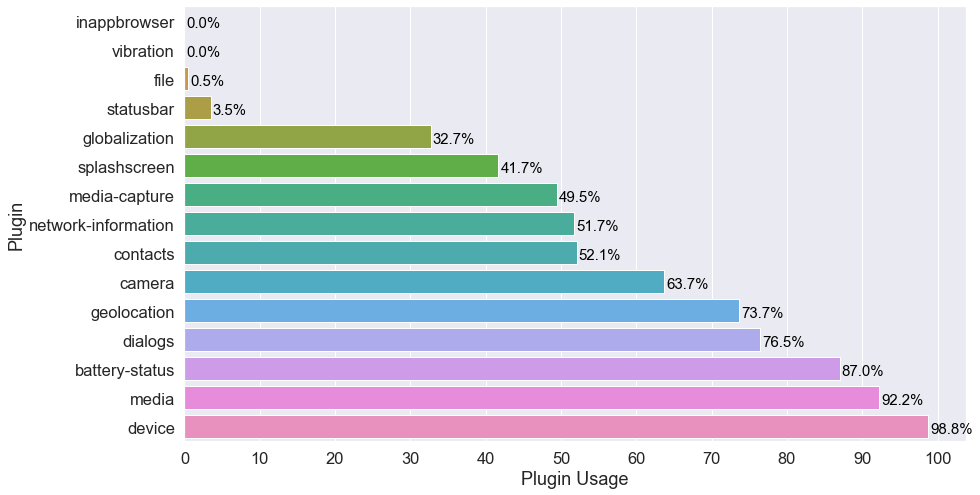

In [11]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Usage")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins declaration

In [12]:
df_plugin_declaration_only = df_plugin_declaration.drop(columns=["apk_name", "config.xml", "plugins.xml"])
df_plugin_dc = df_plugin_declaration_only
total_apk = df_plugin_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_dc_cnt = df_plugin_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_dc_cnt

Total APKs: 578


statusbar                0
vibration                1
inappbrowser           212
globalization          248
splashscreen           399
battery-status         410
network-information    422
contacts               484
camera                 489
media-capture          493
geolocation            497
media                  498
file                   505
dialogs                517
device                 534
dtype: int64

In [13]:
# percentage of apks using each plugin
df_plugin_dc_pct = df_plugin_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_dc_pct

statusbar               0.00
vibration               0.17
inappbrowser           36.68
globalization          42.91
splashscreen           69.03
battery-status         70.93
network-information    73.01
contacts               83.74
camera                 84.60
media-capture          85.29
geolocation            85.99
media                  86.16
file                   87.37
dialogs                89.45
device                 92.39
dtype: float64

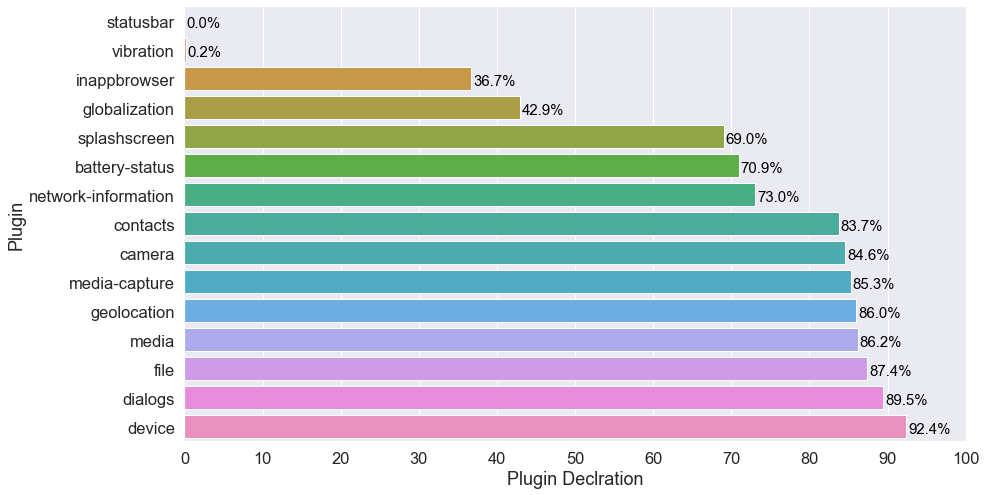

In [14]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_dc_pct.values, y=df_plugin_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugin Uages VS. Plugin Dclaration

In [15]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values)
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration
0,battery-status,87.02,70.93
1,camera,63.67,84.60
2,contacts,52.08,83.74
3,device,98.79,92.39
4,dialogs,76.47,89.45
5,file,0.52,87.37
6,geolocation,73.70,85.99
7,globalization,32.70,42.91
8,inappbrowser,0.00,36.68
9,media,92.21,86.16


In [16]:
# order by value in declaration
df_plugin_vs_order = df_plugin_vs.sort_values(by=['declaration'])
df_plugin_vs_order

,plugin,usage,declaration
13,statusbar,3.46,0.00
14,vibration,0.00,0.17
8,inappbrowser,0.00,36.68
7,globalization,32.70,42.91
12,splashscreen,41.70,69.03
0,battery-status,87.02,70.93
11,network-information,51.73,73.01
2,contacts,52.08,83.74
1,camera,63.67,84.60
10,media-capture,49.48,85.29


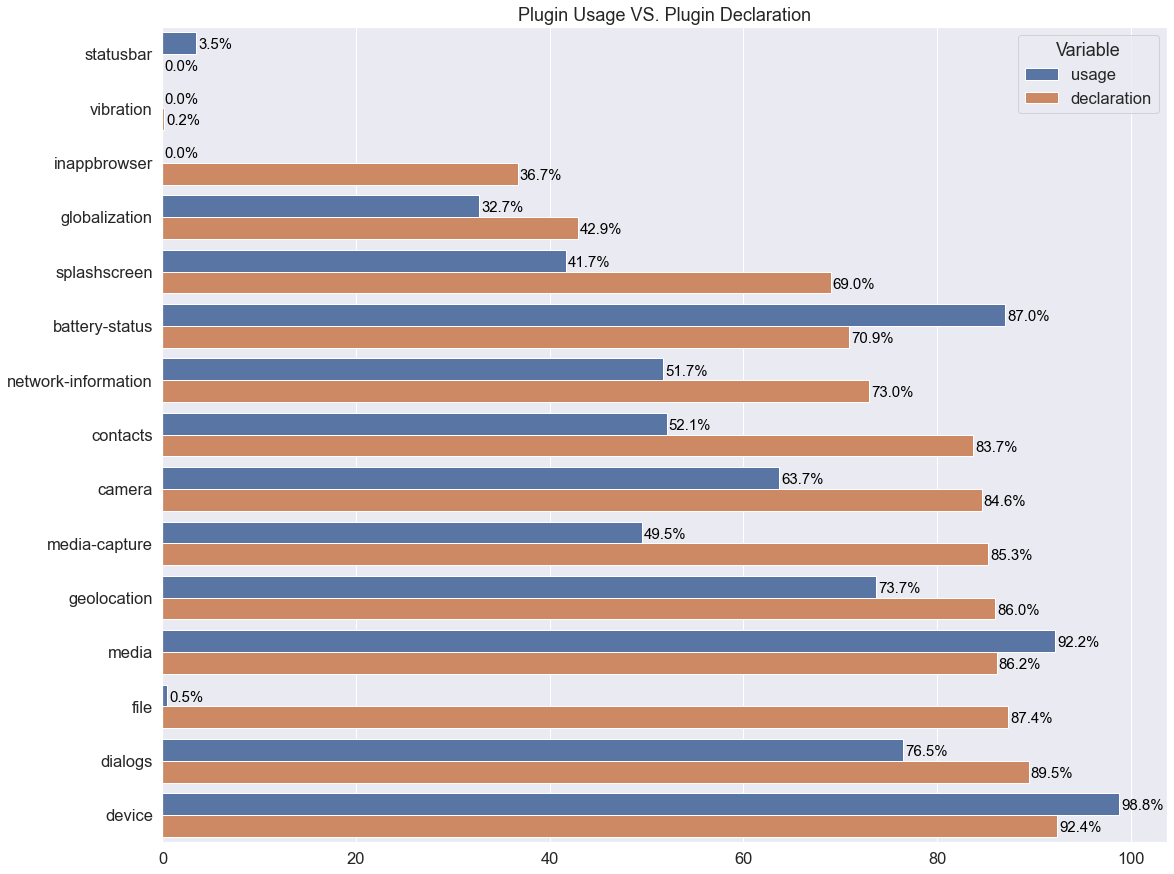

In [17]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 15))
tidy = df_plugin_vs_order.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title('Plugin Usage VS. Plugin Declaration')
plt.show()

### XML analysis

In [18]:
# count APKs missing plugins or config
df_xml = df_plugin_declaration[["config.xml", "plugins.xml"]]
total_apk = df_xml.shape[0]
print(f"Total APKs: {total_apk}")
df_xml_cnt = df_xml.astype(bool).sum(axis=0).sort_values(ascending=True)
df_xml_cnt


Total APKs: 578


plugins.xml    197
config.xml     361
dtype: int64

In [19]:
df_xml["config+plugins"] = df_xml["config.xml"] + df_xml["plugins.xml"]
df_xml

<ipython-input-19-2db17a2d16a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xml["config+plugins"] = df_xml["config.xml"] + df_xml["plugins.xml"]


,config.xml,plugins.xml,config+plugins
0,0,1,1
1,1,0,1
2,1,0,1
3,1,0,1
4,0,0,0
...,...,...,...
573,1,0,1
574,0,0,0
575,0,1,1
576,1,0,1


[20, 518, 40]


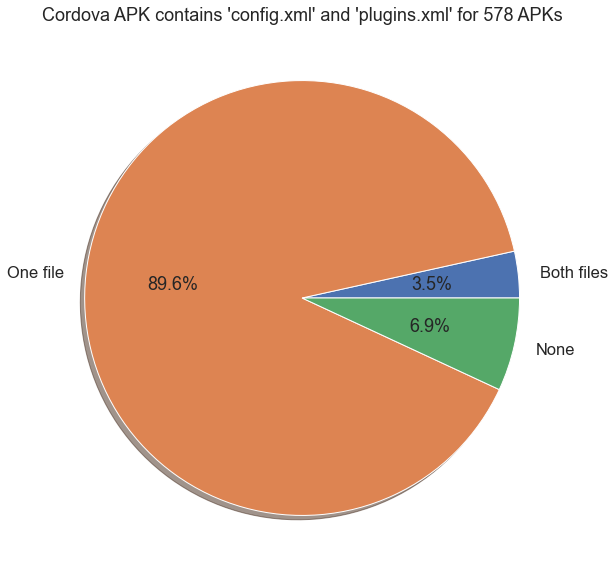

In [20]:
xlm_values = Counter(df_xml['config+plugins'])
labels = ["Both files", "One file", "None"]
sizes = [xlm_values[2], xlm_values[1], xlm_values[0]]
print(sizes)
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# ax1.axis('equal')
plt.title(f"Cordova APK contains 'config.xml' and 'plugins.xml' for {df_xml.shape[0]} APKs")
plt.show()

# Delete APK has none

In [21]:
def output_xml_csv(filename, df_output):
    df_output_new = deepcopy(df_output)
    df_output_new["config+plugins"] = df_xml["config+plugins"]
    df_output_new = df_output_new[df_output_new["config+plugins"]>0]
    df_output_new = df_output_new.drop(columns=["config+plugins"])
    df_output_new.to_csv(f"../db/cdv/{filename}.csv", index=False)


In [22]:
output_xml_csv("cordova_API_xml", df_api)
df_plugin_declaration = df_plugin_declaration.drop(columns=["config.xml", "plugins.xml"])
output_xml_csv("cordova_PLUGIN_DECLARATION_xml", df_plugin_declaration)
output_xml_csv("cordova_PLUGIN_PERMISSION_DECLARATION_xml", df_plugin_permission_declaration)


## Heatmap

### Heatmap for Entire database

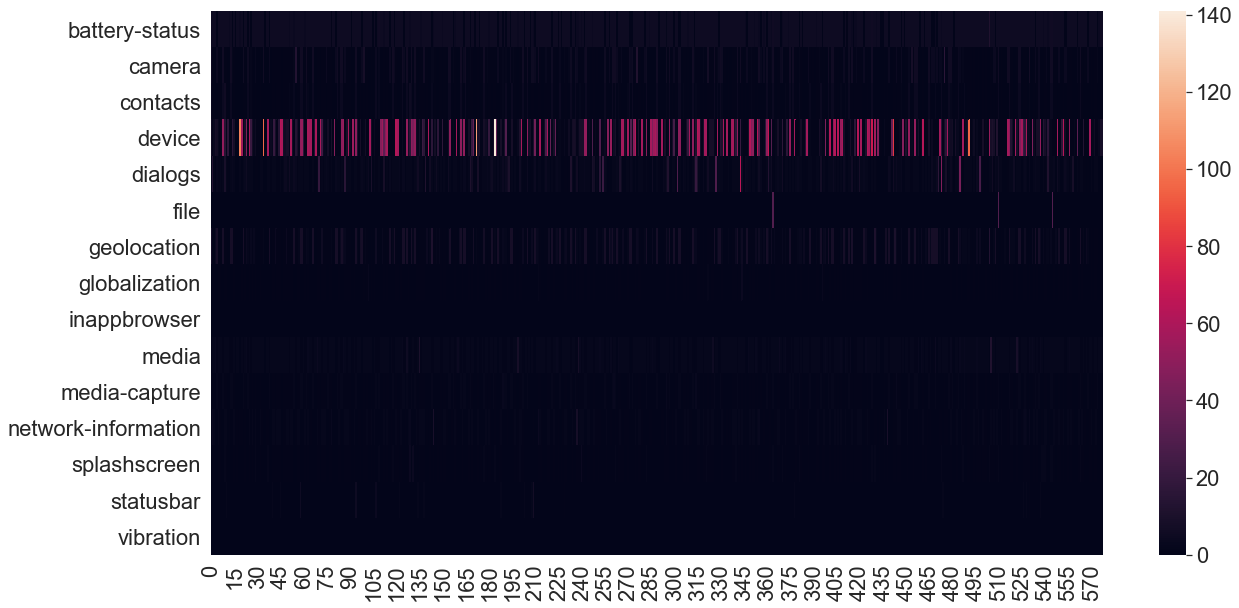

In [23]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)

### Heatmap for a small set of dataset

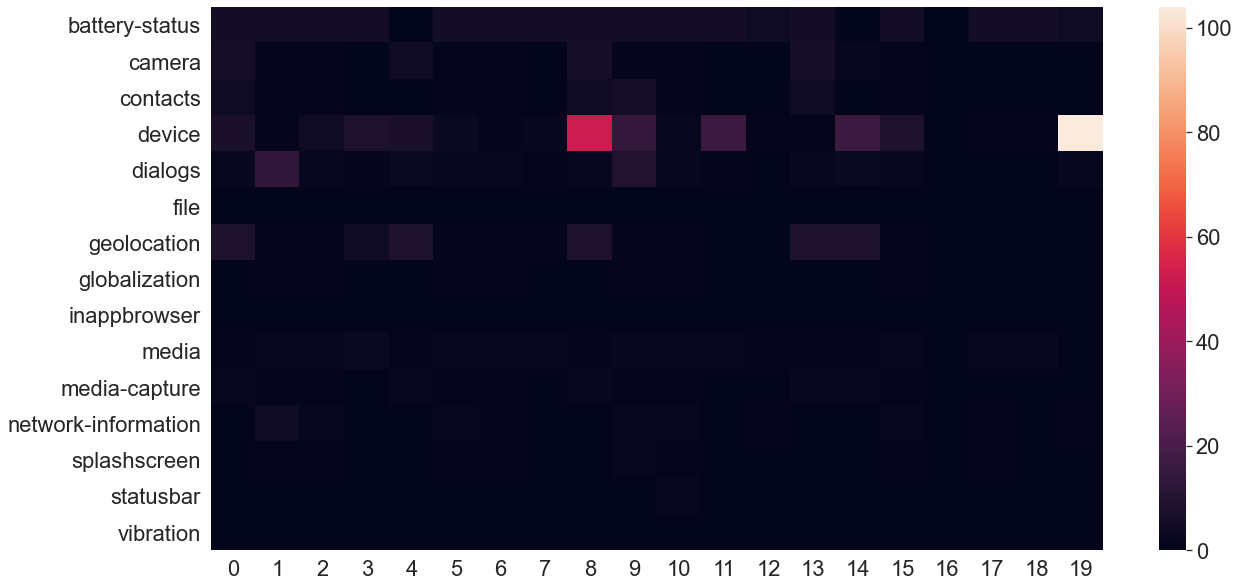

In [24]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])


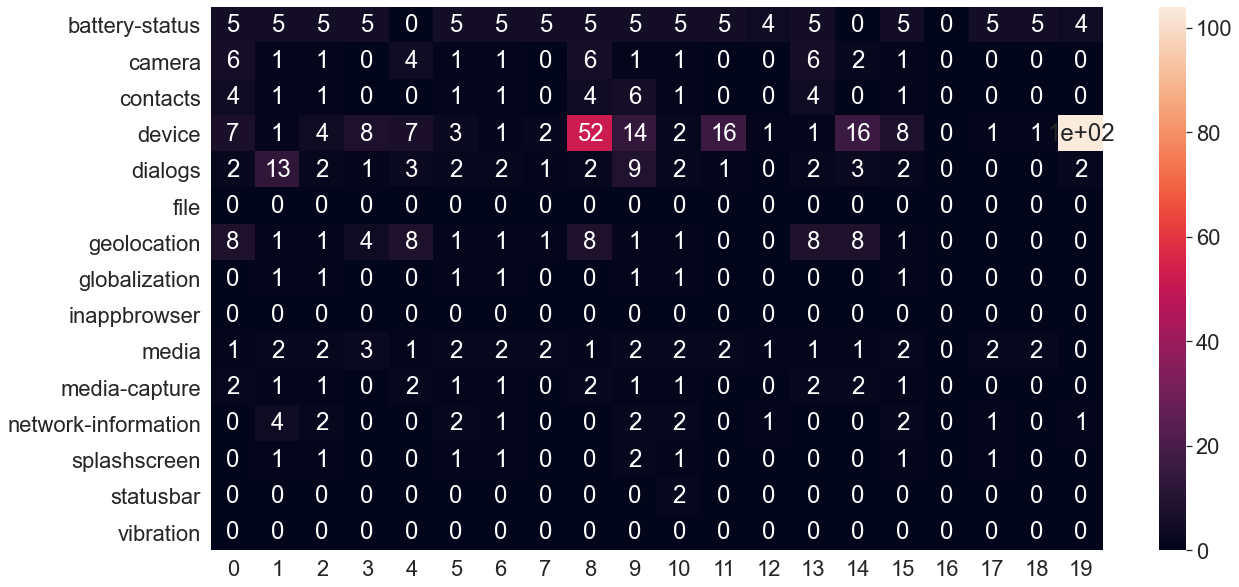

In [25]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

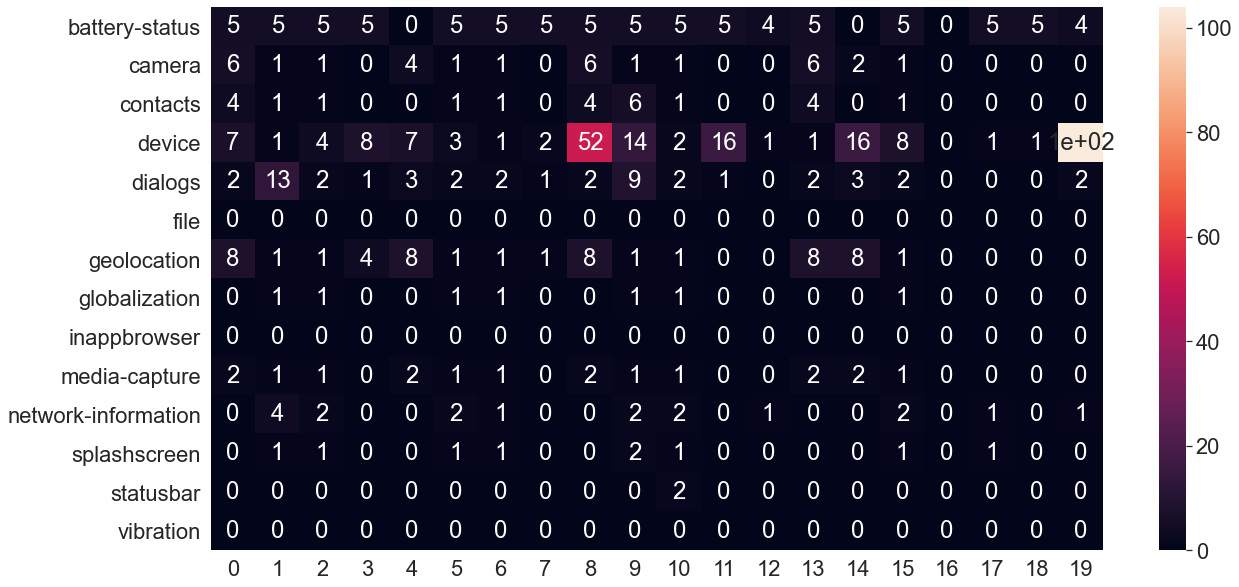

In [26]:

df_plugins_media = df_api.drop(columns=["apk_name", "media"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)